<a href="https://colab.research.google.com/github/gpostill/ML-for-Healthcare-Course/blob/CourseProject/Project_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### ** KMeans Clustering with Dummy Data**




I am creating a dmmy dataset

In [ ]:
import pandas as pd
import numpy as np

#Creating a DataFrame with random data
np.random.seed(0)   #Set a random seed for reproducibility

#Note that there may be inconsistencies in that some people will have diagnosis dates after their death date

data = {'ID': range(1,301), #300 rows
      'Age_death': np.random.randint(1,110,300),
      'sex': np.random.randint(0,2,300), #0(Male), 1(Female)

      #Adding the dconditions -- Random yes (1) / no (0) to indicate presence or absence of disease
      'Asthma': np.random.randint(0,2,300),
      'CHF': np.random.randint(0,2,300),
      'COPD': np.random.randint(0,2,300),
      'Myocardial_infarction': np.random.randint(0,2,300),
      'Hypertension': np.random.randint(0,2,300),
      'Arrythmia': np.random.randint(0,2,300),
      'CCS': np.random.randint(0,2,300),
      'Stroke': np.random.randint(0,2,300),
      'Cancer': np.random.randint(0,2,300),
      'Dementia': np.random.randint(0,2,300),
      'Rental_disease': np.random.randint(0,2,300), #I know this is spelt wrong but the analyst misspelled and I haven't changed
      'Diabetes': np.random.randint(0,2,300),
      'Osteoporosis': np.random.randint(0,2,300),
      'Rheumatoid_Arthritis': np.random.randint(0,2,300),
      'Oseo_Arthritis': np.random.randint(0,2,300),
      'Mood_disorder': np.random.randint(0,2,300),
      'Other_Mental_disorder': np.random.randint(0,2,300),

      #Adding the random age of death
      'Age_Asthma': np.random.randint(18,95,300),
      'Age_CHF': np.random.randint(18,95,300),
      'Age_COPD': np.random.randint(18,95,300),
      'Age_Myocardial_infarction': np.random.randint(18,95,300),
      'Age_Hypertension': np.random.randint(18,95,300),
      'Age_Arrythmia': np.random.randint(18,95,300),
      'Age_CCS': np.random.randint(18,95,300),
      'Age_Stroke': np.random.randint(18,95,300),
      'Age_Cancer': np.random.randint(18,95,300),
      'Age_Dementia': np.random.randint(18,95,300),
      'Age_Rental_disease': np.random.randint(18,95,300), #I know this is spelt wrong but the analyst misspelled and I haven't changed
      'Age_Diabetes': np.random.randint(18,95,300),
      'Age_Osteoporosis': np.random.randint(18,95,300),
      'Age_Rheumatoid_Arthritis': np.random.randint(18,95,300),
      'Age_Oseo_Arthritis': np.random.randint(18,95,300),
      'Age_Mood_disorder': np.random.randint(18,95,300),
      'Age_Other_Mental_disorder': np.random.randint(18,95,300)

      }

#Formatting data into a dataframe structure
df = pd.DataFrame(data)
print(df)

#Removing age of death if no dx:
conditions = ['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']

age_conditions = ['Age_Asthma','Age_CHF','Age_COPD','Age_Myocardial_infarction','Age_Hypertension','Age_Arrythmia','Age_CCS','Age_Stroke','Age_Cancer','Age_Dementia',
                  'Age_Rental_disease','Age_Diabetes','Age_Osteoporosis','Age_Rheumatoid_Arthritis','Age_Oseo_Arthritis','Age_Mood_disorder','Age_Other_Mental_disorder']

for cond,age in zip(conditions,age_conditions):
    df.loc[df[cond] == 0, age] = np.nan


#Creating a Premature Variable
df['Premature'] = ''
df.loc[df['Age_death'] < 75, 'Premature'] = 1
df.loc[df['Age_death'] >= 75, 'Premature'] = 0


#NOTE: I did not add missingness to other sociodemographic variables

#exporting the data as a csv
df.to_csv('DummyData.csv', index = False)

Exploratory data analysis

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Check for missing values in the dataset
df = pd.read_csv('DummyData.csv')
print(df.isna().sum())

ID                             0
Age_death                      0
sex                            0
Asthma                         0
CHF                            0
COPD                           0
Myocardial_infarction          0
Hypertension                   0
Arrythmia                      0
CCS                            0
Stroke                         0
Cancer                         0
Dementia                       0
Rental_disease                 0
Diabetes                       0
Osteoporosis                   0
Rheumatoid_Arthritis           0
Oseo_Arthritis                 0
Mood_disorder                  0
Other_Mental_disorder          0
Age_Asthma                   146
Age_CHF                      166
Age_COPD                     131
Age_Myocardial_infarction    154
Age_Hypertension             148
Age_Arrythmia                141
Age_CCS                      142
Age_Stroke                   142
Age_Cancer                   148
Age_Dementia                 155
Age_Rental

In [ ]:
# Summary Statistics
print(df.describe())
df

               ID   Age_death         sex      Asthma         CHF        COPD  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   52.873333    0.500000    0.513333    0.446667    0.563333   
std     86.746758   31.090072    0.500835    0.500657    0.497978    0.496801   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     75.750000   28.000000    0.000000    0.000000    0.000000    0.000000   
50%    150.500000   51.000000    0.500000    1.000000    0.000000    1.000000   
75%    225.250000   80.000000    1.000000    1.000000    1.000000    1.000000   
max    300.000000  109.000000    1.000000    1.000000    1.000000    1.000000   

       Myocardial_infarction  Hypertension   Arrythmia         CCS  ...  \
count             300.000000    300.000000  300.000000  300.000000  ...   
mean                0.486667      0.506667    0.530000    0.526667  ...   
std                 0.500657      0.500791   

,ID,Age_death,sex,Asthma,CHF,COPD,Myocardial_infarction,Hypertension,Arrythmia,CCS,...,Age_Cancer,Age_Dementia,Age_Rental_disease,Age_Diabetes,Age_Osteoporosis,Age_Rheumatoid_Arthritis,Age_Oseo_Arthritis,Age_Mood_disorder,Age_Other_Mental_disorder,Premature
0,1,45,0,1,1,0,0,0,0,1,...,74.0,38.0,33.0,41.0,47.0,NaN,93.0,NaN,NaN,1
1,2,48,1,1,0,1,1,0,1,1,...,NaN,NaN,NaN,35.0,66.0,NaN,70.0,50.0,NaN,1
2,3,65,0,1,0,1,1,0,0,0,...,NaN,NaN,53.0,78.0,74.0,NaN,NaN,66.0,NaN,1
3,4,68,1,1,0,1,0,0,0,0,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,68,0,1,1,1,0,0,1,0,...,NaN,NaN,43.0,NaN,NaN,NaN,37.0,NaN,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,6,0,1,1,1,0,1,1,1,...,NaN,30.0,35.0,40.0,50.0,66.0,23.0,NaN,NaN,1
296,297,105,0,0,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,71.0,NaN,25.0,30.0,51.0,0
297,298,37,1,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,1
298,299,1,1,0,1,0,0,0,0,1,...,46.0,46.0,NaN,NaN,47.0,NaN,35.0,NaN,NaN,1


In [ ]:
# Check the distribution of age
# Create an interactive histogram for 'age'
fig = px.histogram(df, x='Age_death', nbins=50, title='Distribution of Age at death', color_discrete_sequence=['#b59a36'])
fig.show('colab')

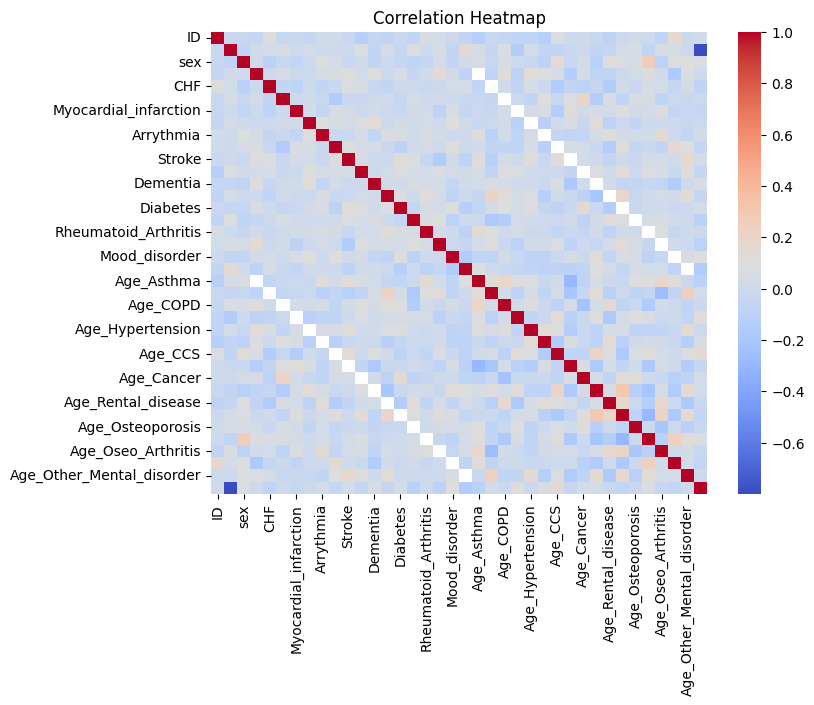

In [ ]:
#Check for collinearity

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

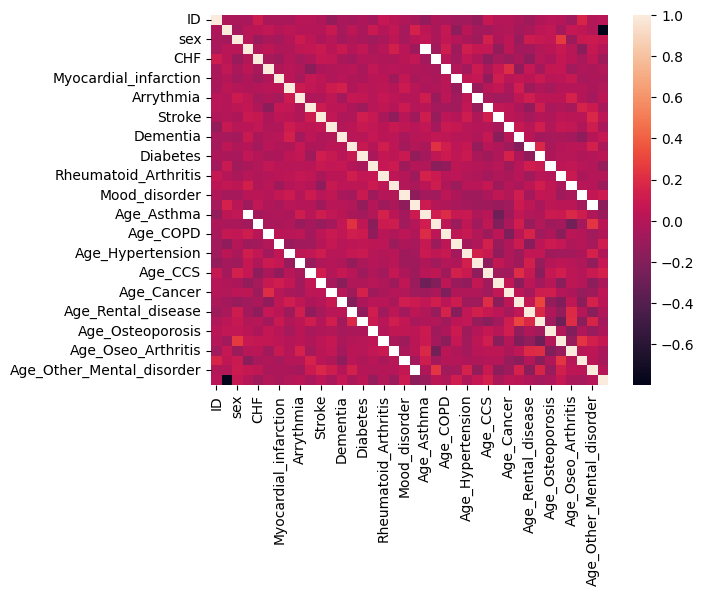

In [ ]:
sns.heatmap(df.corr())

Check for class imbalance

In [ ]:
counts = df['Premature'].value_counts()

# Define the color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='"Distribution of Premature mortality"',
    color_discrete_sequence=colors  # apply the colors
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Class/ASD'
    ),
    title=dict(
        text='Distribution of Classes in "Premature mortality"',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

Running the Kmeans Approach Below

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

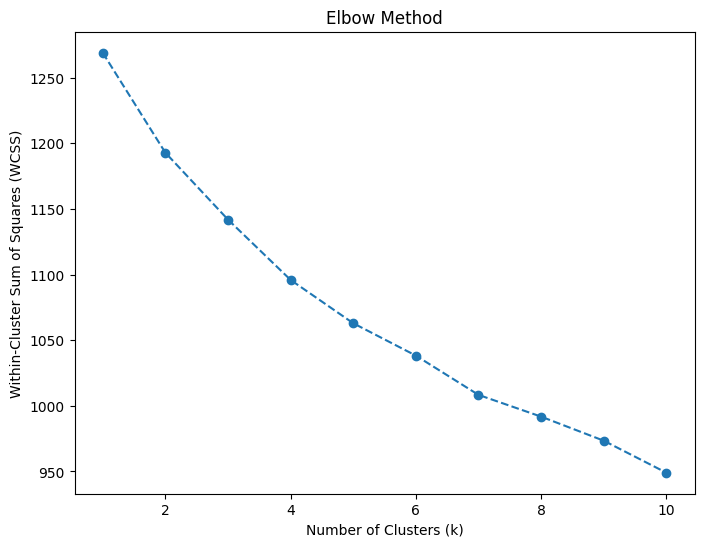

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


#IMPORTING THE DATAFRAME

#Note that the dataframe is already preprocessed to 0/1 for condiiton and subsetted to only peplple with IBD
df = pd.read_csv('DummyData.csv')

df_cluster = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']]


#ELBOW METHODS TO DETERMINE OPTIMAL CLUSTERS

wcss = [] #initializing an empty list to store the within-cluster sum of squares (WCSS) values

#Tring different values of K (number of clusters)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

#Plot the WCSS values for different values of k
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.savefig('Elbow_DummyData.png')
plt.show()



Based on our elbow graph, we have identified 5 as the optimal number of clusters

In [ ]:

#KMEANS WITH OPTIMAL NUMBER OF CLUSTERS: 5

kmeans = KMeans(n_clusters=5, random_state=0) #random_state fixes the environment
cluster_labels = kmeans.fit_predict(df_cluster)

#Identifying the labels of the clusters
df_cluster['Cluster'] = cluster_labels #making a column with the labels of the clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-8d31e17a82eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = cluster_labels #making a column with the labels of the clusters


In [ ]:
#DESCRIBING CLUSTERS

#Creating a new df for the description of each cluster
df_cluster_descriptive = df_cluster.copy() #copying the original dataset
add_to_df = ['Age_death', 'sex', 'Age_Asthma','Age_CHF','Age_COPD','Age_Myocardial_infarction','Age_Hypertension','Age_Arrythmia','Age_CCS','Age_Stroke','Age_Cancer','Age_Dementia',
             'Age_Rental_disease','Age_Diabetes','Age_Osteoporosis','Age_Rheumatoid_Arthritis','Age_Oseo_Arthritis','Age_Mood_disorder','Age_Other_Mental_disorder']

for column in add_to_df:
    df_cluster_descriptive[column] = df[column]

grouped_data = df_cluster_descriptive.groupby('Cluster')

#summarizing the clusters
cluster_statistics = grouped_data.describe()
cluster_statistics = cluster_statistics.transpose()
cluster_statistics.to_csv('cluster_statistics_DummyData.csv')

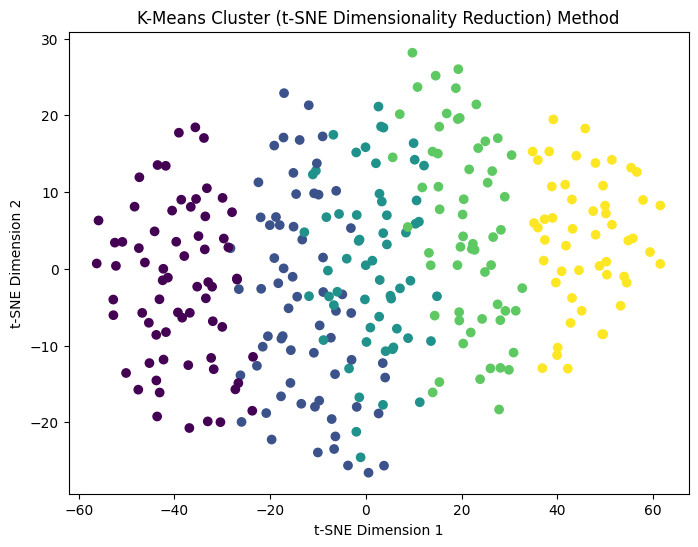

In [ ]:
#PLOTTING THE CLUSTERS

#Reducing the data with t-SNE
tsne = TSNE(n_components=3, perplexity=40, random_state=0)
tsne_result = tsne.fit_transform(df_cluster)

#Creating a scatter plot of t-SNE results colored by cluster
plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=cluster_labels, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('K-Means Cluster (t-SNE Dimensionality Reduction) Method')
plt.savefig('Elbow_DummyData.png')
plt.show()


Logistic Regression Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Split the data into features and target variable
X = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']]
y = df['Premature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Build the logistic regression model

Confusion Matrix:
[[ 2 14]
 [ 5 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        16
           1       0.74      0.89      0.80        44

    accuracy                           0.68        60
   macro avg       0.51      0.51      0.49        60
weighted avg       0.62      0.68      0.64        60



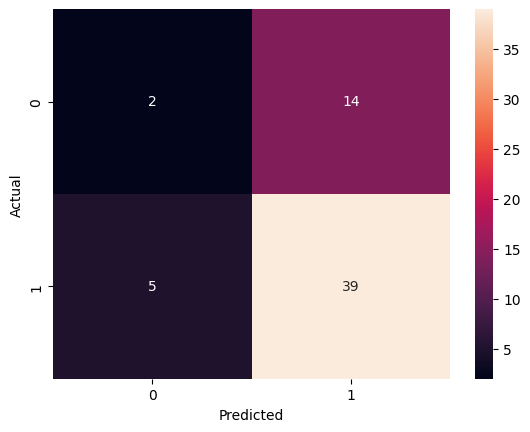

Optimization terminated successfully.
         Current function value: 0.563406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Premature   No. Observations:                  300
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           17
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                 0.06892
Time:                        10:44:13   Log-Likelihood:                -169.02
converged:                       True   LL-Null:                       -181.53
Covariance Type:            nonrobust   LLR p-value:                   0.09422
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.1387      0.577      3.710      0.000       1.009       3.

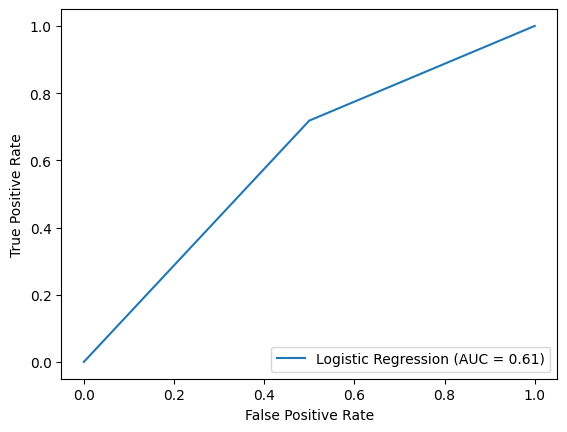

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Make predictions on the test and training sets
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
#conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
#conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
#print('======== Training Set ==========')
#print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
#print('======== Test Set ==========')
#print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_test, y_test)
roc_auc_test = auc(fpr, tpr)
display_test = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display_test.plot()

## Model Summary
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

# Extract p-values and odds ratios
p_values = log_reg.pvalues
odds_ratios = np.exp(log_reg.params)

# Filter variables based on a significance level (e.g., 0.05)
significant_vars = p_values[p_values < 0.05]
significant_odds_ratios = odds_ratios[p_values < 0.05]

# Print significant variables and their odds ratios
print("Significant Variables:")
print(significant_vars)
print("Odds Ratios for Significant Variables:")
print(significant_odds_ratios)
print("Odds Ratios of all Variables:")
print(odds_ratios)

Perform Cross validation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.pipeline import Pipeline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Split the data into features and target variable
X = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']]
y = df['Premature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Cross-valiation setup using K-fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_validation_loss = 0
for train_index, valid_index in kf.split(X_train):
  X_train_data, X_valid_data = X_train.iloc[train_index],
  X_train.iloc[valid_index]
  Y_train_data, Y_valid_data = y_train.iloc[train_index], y_train.iloc[valid_index]

# Define Pipeline model
model = Pipeline([('nomralizer', StandardScaler()), (classifier', LogisticRegression())])

# Fit the model
model = LogisticRegression()
model.fit(X_train_data)

# Assess the model
  y_valid_pred = model.predict(Y_test_train_data)
  validation_acc = accuracy_score(Y_valid_data, y_valid_pred)
  total_validation_loss += validation_acc

  total_validation_loss /=k




SyntaxError: ignored

In [ ]:
# Import necessary libraries for feature selection and logistic regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Make a copy of the dataset
#df_cv=df

# Split the data into features and target variable
X = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']]
y = df['Premature']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preprocess the training and test sets
#X_train, y_train = transform(train)
#X_test = transform(test)
y_test = test['Premature'].to_numpy()

# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC)
    min_features_to_select=1,
)
rfecv.fit(X_train, y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")


Optimal number of features: 3


In [ ]:
# which columns used and which wasn't
rfecv.support_  #Selected features are Osteoporosis, Osteo_Arthritis and Other_Mental_disorder

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True])

Now train the model using only the selected features

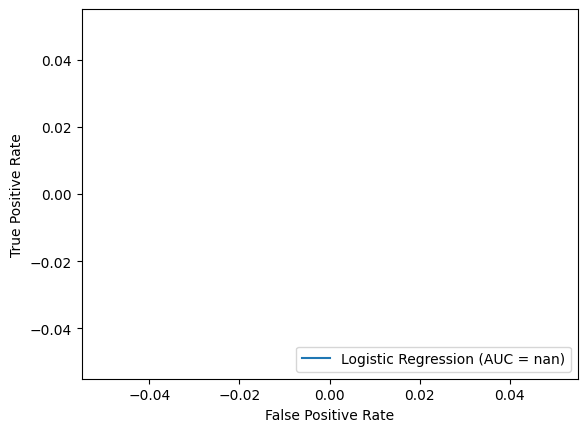

In [ ]:
# Preprocess the training and test sets

Y_test = test['Premature'].to_numpy()

# Select only the features that were chosen by RFECV
#X_train = X_train['Osteoporosis', 'Osteo_Arthritis', 'Other_Mental_disorder'_]
#X_test = X_test['Osteoporosis', 'Osteo_Arthritis', 'Other_Mental_disorder'_]

# Split the data into features and target variable using only RFECV support features
X = df[['Osteoporosis','Oseo_Arthritis','Other_Mental_disorder']]
y = df['Premature']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
#conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
#conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
#print('======== Training Set ==========')
#print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
#print('======== Test Set ==========')
#print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

In [ ]:
# features ranking low is better
rfecv.ranking_

array([11,  3,  7,  5,  9, 13,  2, 10,  6,  8, 14, 12,  1, 15,  1,  4,  1])

In [8]:
!apt-get install git
!git config --global user.name "Gemma Postill"
!git config --global user.email "gemmapostill@gmail.com"

!git clone https://github.com/gpostill/ML-for-Healthcare-Course.git
%cd ML-for-Healthcare-Course

!git add .
!git commit -m "Project Phase 2"

!git push origin main

#git remote add origin https://github.com/gpostill/ML-for-Healthcare-Course.git
#git branch -M main
#git push -u origin main

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Cloning into 'ML-for-Healthcare-Course'...
/content/ML-for-Healthcare-Course
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/gpostill/ML-for-Healthcare-Course.git'
